# Bike Sharing

목표: 자전거 대여 데이터를 활용하여 회귀 모델을 구축하고, 다양한 실험을 통해 모델의 성과 분석

- 데이터 소개
    - 데이터: 2011.01.01 ~ 2012.12.31 까지의 자전거 대여량 데이터
    - 열: 총 17개의 열로 구성
        - 자전거 대여 횟수`cnt`를 포함

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

## CSV 파일 로드

In [3]:
bike_sharing = pd.read_csv('/Users/project/python/regression/bike_sharing.csv')
bike_sharing

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## 데이터 확인

In [4]:
bike_sharing.shape

(17379, 17)

In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- 문제 해결 방법 정리  
첫번째 시도. dteday (object)를 drop 해도 될 듯 ?(약 99%)  
두번째 시도. dteday (object)를 datetime으로 바꿔서 해보기?   
   why? yr (0, 1), mnth(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
=> X_train, X_test: 0 ~ 15: 입력 특성  
=> y_train, y_test: 16: 타겟 변수  

### object(dteday) 수정

In [6]:
bike_sharing = bike_sharing.drop('dteday', axis=1)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


## 모델링

### 입력 특성과 타겟 분리

In [10]:
X = bike_sharing.iloc[:, :-1]  # 마지막 열을 제외한 나머지 열은 입력 특성
y = bike_sharing.iloc[:, -1]   # 마지막 열은 타겟 변수

print(f'X date : {X}')
print(f'\n y data : {y}')

X date :        instant  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1       1   0     1   0        0        6           0   
1            2       1   0     1   1        0        6           0   
2            3       1   0     1   2        0        6           0   
3            4       1   0     1   3        0        6           0   
4            5       1   0     1   4        0        6           0   
...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375       1   1    12  19        0        1           1   
17375    17376       1   1    12  20        0        1           1   
17376    17377       1   1    12  21        0        1           1   
17377    17378       1   1    12  22        0        1           1   
17378    17379       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  
0               1  0.24  0.2879  0.81     0.0000       3          13  
1       

### 훈련 데이터와 테스트 데이터 분할

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=11)

print(f'X train : {X_train.shape}')
print(f'y train : {y_train.shape}')
print(f'X test : {X_test.shape}')
print(f'y test : {y_test.shape}')

X train : (13903, 15)
y train : (13903,)
X test : (3476, 15)
y test : (3476,)


### DecisionTreeRegressor 모델 생성

In [12]:
model = DecisionTreeRegressor()

#### DecisionTreeRegressor 모델 속성 출력

In [13]:
for attr in dir(model):
    if not attr.startswith('_'): print(attr)

apply
ccp_alpha
class_weight
cost_complexity_pruning_path
criterion
decision_path
feature_importances_
fit
get_depth
get_metadata_routing
get_n_leaves
get_params
max_depth
max_features
max_leaf_nodes
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
predict
random_state
score
set_fit_request
set_params
set_predict_request
set_score_request
splitter


### 모델 훈련

In [14]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
print(f'depth = {model.get_depth()}\nger_n_leaves = {model.get_n_leaves()}')

depth = 22
ger_n_leaves = 7295


### 테스트 데이터에 대한 정확도 계산

In [16]:
accuracy = model.score(X_test, y_test)
print(f'{accuracy = }')

accuracy = 0.9992590396572587


### 각 feature 별 정확도 분석

In [17]:
feature_accuracies = {}  # 각 feature의 정확도를 저장하기 위한 딕셔너리

for feature in bike_sharing.columns:
    if feature != 'cnt':                                                # 'cnt' feature 제외
        X_train_feature = X_train.drop(feature, axis=1)                 # 현재 feature을 제외한 새로운 훈련 데이터 생성
        X_test_feature = X_test.drop(feature, axis=1)                   # 현재 feature을 제외한 새로운 테스트 데이터 생성

        model_feature = DecisionTreeRegressor()                         # DecisionTreeRegressor 모델 생성
        model_feature.fit(X_train_feature, y_train)                     # 수정된 훈련 데이터로 모델 훈련
        accuracy_feature = model_feature.score(X_test_feature, y_test)  # 수정된 테스트 데이터에 대한 정확도 계산

        feature_accuracies[feature] = accuracy_feature   

In [18]:
# 결과 출력
for feature, accuracy in feature_accuracies.items():
    print(f'{feature}: {accuracy}')

instant: 0.9992842867063662
season: 0.9992620518360792
yr: 0.9992291050162592
mnth: 0.9992504397976087
hr: 0.9992463849415043
holiday: 0.9992195961559001
weekday: 0.9993543421433705
workingday: 0.9992401199660286
weathersit: 0.9993275355342229
temp: 0.9992312884003154
atemp: 0.999365615534518
hum: 0.9994012180622921
windspeed: 0.9992282405744084
casual: 0.9823486142886871
registered: 0.935694545010727


### 그래프 그리기

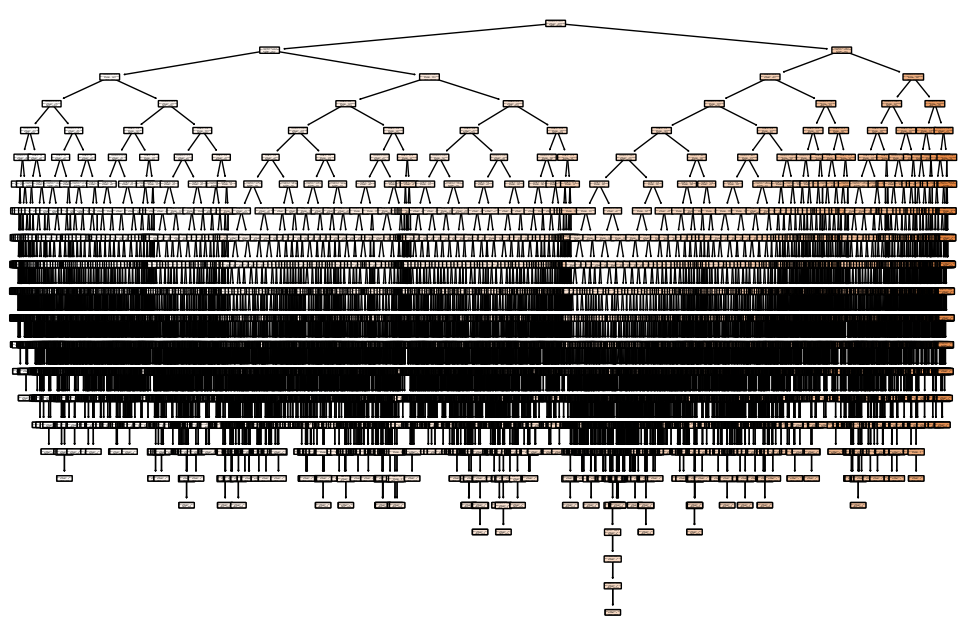

In [21]:
plt.figure(figsize=(12, 8))
tree.plot_tree(model,
               feature_names=bike_sharing.columns.tolist(),
               filled=True, rounded=True)
plt.show()

## Decision Tree 결과 분석

1. 모델의 구조
    - 트리의 깊이(depth): depth = 22
                         트리가 22단계까지 깊게 분할 되었음을 의미한다.
                         더 깊은 트리는 더 복잡한 모델을 나타내지만, 과적합 가능성이 높아질 수 있다.
    - 리프 노드의 개수(get_n_leaves): ger_n_leaves = 7296
                                     많은 리프노드는 모델이 데이터를 세분화하고 다양한 패턴을 학습할 수 있음을 나타낸다.
2. 모델 정확도
    - R-squared(결정계수): accuracy = 0.9992371166989799
    - 모델의 테스트 데이터의 변동이 약 99.92% 정도라고 설명할 수 있다.
        이는 모델이 입력된 특성을 기반으로 자전거 대여수를 매우 정확하게 예측할 수 있다는 것을 의미한다.
        하지만, 정확도가 100%에 가까울 경우 과적합 가능성이 있기 때문에 주의해야 한다.
3. 모델 총평
    - 이 모델은 매우 깊고 복잡한 결정 트리를 생성하여 훈련 데이터에 매우 잘 적합하지만,
      복잡성이 새로운 데이터에 대한 일반화 성능을 저하시킬 수 있다.
    - 모델 수정이 필요한 경우, 다른 기법을 통해 모델 성능을 평가해보는 게 좋을 수 있을 거 같다.